<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/GreenSpaceSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the runtime to GPU

In [1]:
%pip install -U segment-geospatial

In [2]:
import leafmap
from samgeo import SamGeo2

# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Path to your folder
folder_path = '/content/drive/My Drive/Sentinel2ANew'

# List files in the folder to verify access
print(os.listdir(folder_path))

['20181217.tif', '20181227.tif', '20190126.tif', '20190322.tif', '20190312.tif', '20190401.tif', '20190421.tif', '20190531.tif', '20190501.tif', '20190610.tif', '20190630.tif', '20190819.tif', '20190720.tif', '20190908.tif', '20191008.tif', '20191028.tif', '20191013.tif', '20191202.tif', '20191207.tif', '20191217.tif', '20191222.tif', '20200210.tif', '20200225.tif', '20200215.tif', '20200515.tif', '20200525.tif', '20200520.tif', '20200714.tif', '20200917.tif', '20200922.tif', '20200927.tif', '20201002.tif', '20201017.tif', '20201022.tif', '20201027.tif', '20201106.tif', '20201121.tif', '20201126.tif', '20201201.tif', '20201216.tif', '20210120.tif', '20210125.tif', '20210130.tif', '20210214.tif', '20210224.tif', '20210301.tif', '20210326.tif', '20210410.tif', '20210425.tif', '20210609.tif', '20210629.tif', '20210619.tif', '20211007.tif', '20211106.tif', '20211027.tif', '20211111.tif', '20211121.tif', '20211116.tif', '20211201.tif', '20211126.tif', '20211206.tif', '20211211.tif', '202112

In [13]:
# List files in the folder to verify access
files = os.listdir(folder_path)
print("Original files:", files)

# Iterate through the files and rename them
for filename in files:
    if filename.endswith('.tif'):
        # print("entering")
        # Extract the date part from the filename
        date_str = filename[:-4]  # Remove the '.tif' extension
        # print("datestr ",date_str)
        # Convert to the desired format
        new_date_str = date_str.replace('-', '')  # Remove dashes
        new_filename = f"{new_date_str}.tif"  # Add the .tif extension

        # Create full paths for the old and new filenames
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        # print(f'Renamed: {filename} to {new_filename}')

# List files again to verify the changes
print(os.listdir(folder_path))

Original files: ['2018-12-17.tif', '2018-12-27.tif', '2019-01-26.tif', '2019-03-22.tif', '2019-03-12.tif', '2019-04-01.tif', '2019-04-21.tif', '2019-05-31.tif', '2019-05-01.tif', '2019-06-10.tif', '2019-06-30.tif', '2019-08-19.tif', '2019-07-20.tif', '2019-09-08.tif', '2019-10-08.tif', '2019-10-28.tif', '2019-10-13.tif', '2019-12-02.tif', '2019-12-07.tif', '2019-12-17.tif', '2019-12-22.tif', '2020-02-10.tif', '2020-02-25.tif', '2020-02-15.tif', '2020-05-15.tif', '2020-05-25.tif', '2020-05-20.tif', '2020-07-14.tif', '2020-09-17.tif', '2020-09-22.tif', '2020-09-27.tif', '2020-10-02.tif', '2020-10-17.tif', '2020-10-22.tif', '2020-10-27.tif', '2020-11-06.tif', '2020-11-21.tif', '2020-11-26.tif', '2020-12-01.tif', '2020-12-16.tif', '2021-01-20.tif', '2021-01-25.tif', '2021-01-30.tif', '2021-02-14.tif', '2021-02-24.tif', '2021-03-01.tif', '2021-03-26.tif', '2021-04-10.tif', '2021-04-25.tif', '2021-06-09.tif', '2021-06-29.tif', '2021-06-19.tif', '2021-10-07.tif', '2021-11-06.tif', '2021-10-27

# Initialize Model

In [4]:
predictor = SamGeo2(
    model_id="sam2-hiera-tiny",
    video=True,
)

# Specify the Input Data Path

In [5]:

predictor.set_video(folder_path)

frame loading (JPEG): 100%|██████████| 86/86 [00:07<00:00, 11.83it/s]


interactive(children=(IntSlider(value=0, description='Image', max=85), Output()), _dom_classes=('widget-intera…

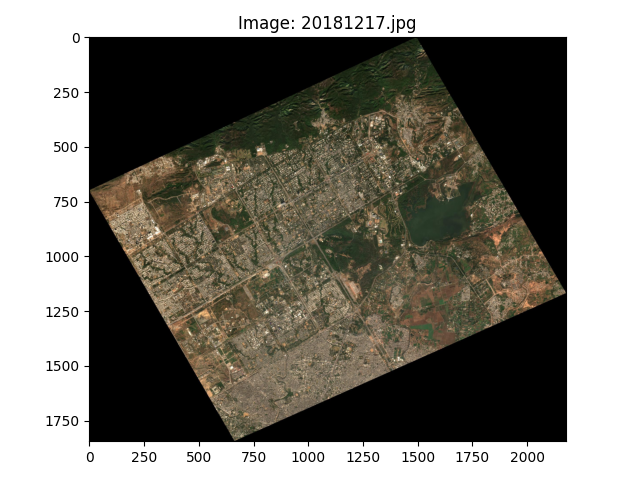

In [6]:
predictor.show_images()

In [7]:
prompts = {
    1: {
        "points": [[716,409], [1552,825]],
        "labels": [1, 1],
        "frame_idx": 0,
    },
}

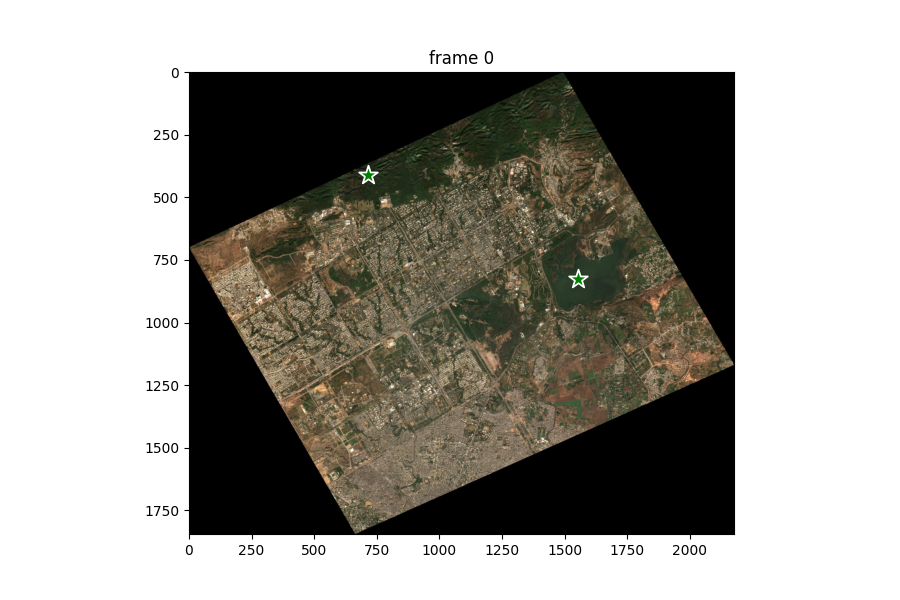

In [8]:
predictor.show_prompts(prompts, frame_idx=0)

# Segment the Objects

In [9]:
predictor.predict_video()

propagate in video: 100%|██████████| 86/86 [00:37<00:00,  2.31it/s]


# Save Results

In [10]:
predictor.save_video_segments("segmentsofSentinel2ANew")

Rendering frames: 100%|██████████| 86/86 [00:08<00:00,  9.71it/s]


In [ ]:
predictor.save_video_segments_blended(
    "TS_blended_Sentinel2ANew", fps=5, output_video="segments_blended_Sentinel2ANew.mp4"
)

Rendering frames:  67%|██████▋   | 58/86 [03:42<02:04,  4.45s/it]